C:\Users\lance\AppData\Local\Temp\ipykernel_6660\1807626097.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Set2')
C:\Users\lance\AppData\Local\Temp\ipykernel_6660\1807626097.py:66: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Circle((x, y), r, color=color, alpha=0.7, edgecolor='black'))


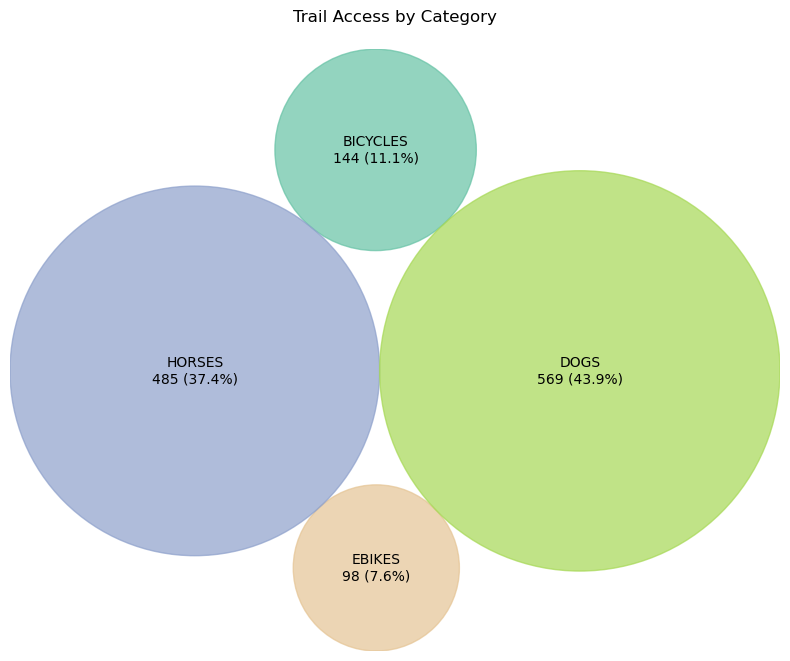

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import circlify
import matplotlib.cm as cm

# Load CSV
csv_path = "C:/Repository/Project 3/Project 3 update/Data-Visualization/Project 3/resources/Trails.csv"
df = pd.read_csv(csv_path)

# Count 'Yes' values
columns_of_interest = {
    "BICYCLES": "OSMPTrailsOSMPBICYCLES",
    "HORSES": "OSMPTrailsOSMPHORSES",
    "DOGS": "OSMPTrailsOSMPDOGS",
    "EBIKES": "OSMPTrailsOSMPEBIKES"
}
trail_use_counts = {
    key: (df[col] == "Yes").sum()
    for key, col in columns_of_interest.items()
}

# Calculate total for percentage
total_count = sum(trail_use_counts.values())

# Build data list
data = [{'id': k, 'datum': v} for k, v in trail_use_counts.items() if v > 0]

# Create circle layout
circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Determine axis limits
x_coords = [c.x for c in circles if c.level == 1]
y_coords = [c.y for c in circles if c.level == 1]
radii = [c.r for c in circles if c.level == 1]
x_min = min(x - r for x, r in zip(x_coords, radii))
x_max = max(x + r for x, r in zip(x_coords, radii))
y_min = min(y - r for y, r in zip(y_coords, radii))
y_max = max(y + r for y, r in zip(y_coords, radii))

# Color map
colormap = cm.get_cmap('Set2')

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.axis('off')

# Draw circles and label with count + percentage
for circle in circles:
    if circle.level != 1:
        continue

    x, y, r = circle.x, circle.y, circle.r
    label = circle.ex['id']
    value = int(circle.ex['datum'])
    percent = (value / total_count) * 100
    label_text = f"{label}\n{value} ({percent:.1f}%)"
    color = colormap(data.index(circle.ex) / len(data))

    ax.add_patch(plt.Circle((x, y), r, color=color, alpha=0.7, edgecolor='black'))
    plt.text(x, y, label_text, ha='center', va='center', fontsize=10)

plt.title("Trail Access by Category", pad=20)
plt.tight_layout()
plt.show()